# Microsoft on the Big Screen
***

![example](https://github.com/emmigalfo/dsc-phase-1-project-v2-4/blob/master/Images/in_the_theatre.jpeg)

**Author:** [Emmi Galfo](mailto:emmi.galfo@gmail.com)
***

## Overview 
***

This project aims to guide Microsoft as it gets into the movie industry. Through exploratory analysis, factors such as genre, directors, movie runtime, and production budget are analysed to determine effects on net profit and return on investment. It turns out that what is needed for a higher return on investment is different than what is needed for a higher net profit. Higher budget films in the animation, kids & family, and fiction & fantasy genres make more net profit, whereas lower budget films in the horror, special interest, and documentary genres have higher returns on investment. 



## Business Problem
***
Microsoft is looking to get into the movie industry by starting their own movie studio. They need someone to explore what makes movies successful and provide them with reccommendations. For a business, being profitable is one great way to measure success. This project looks at the following variables and their potential to affect Microsoft's return on investment as well as their net profit:
*  Genre
*  Director
*  Runtime
*  Production Budget


## Data Understanding
***
In order to see which movies are most successful and why, reliable data is needed! Fortunately, there are plenty of excellent websites which gather all sorts of information on movies. All of the exploratory analysis for this project was able to be done with just two main data sets. First, a data set was collected from the website, The Numbers, which supplies movies budgets and worldwide gross figures. Second, a data set from Rotten Tomatoes was used to get information about movies' genres, directors, and runtime. The two data sets were then joined together to analyse. 


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#The Numbers data set:
budget = pd.read_csv('./data/tn.movie_budgets.csv')

#Rotten Tomatoes data set:
rtm = pd.read_csv('./data/rotten_tomatoes_movies.csv')

## Data Preparation
***

### Data from The Numbers
In order to be useful, the data is converted from objects to integers, and then unneccessary columns are dropped. 

In [3]:
#clean up budget data by:
#1 removing $ sign
#2 converting from str to int
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budget['production_budget'] = budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

#simplify dataframe by removing unneccessary columns
budget.drop(['domestic_gross', 'release_date'], axis=1, inplace=True)

We want to be able to measure return on investment (ROI) and net profit. To do this, the new columns __ROI__ and __net_profit__, are created. 

In [4]:
budget['net_profit'] = (budget['worldwide_gross']-budget['production_budget'])
budget['ROI'] = (budget['net_profit']/budget['production_budget'])

### Joining with data from Rotten Tomatoes

Upon examination of the Rotten Tomatoes data set, there were many unnecessary columns. In this case, it is more efficient to create a new data set with only the necessary columns. 

In [5]:
rtm.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [6]:
#create new dataframe with selected columns
rtm2 = rtm[['movie_title', 'genres', 'directors','runtime']]
rtm2.head()

,movie_title,genres,directors,runtime
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,119.0
1,Please Give,Comedy,Nicole Holofcener,90.0
2,10,"Comedy, Romance",Blake Edwards,122.0
3,12 Angry Men (Twelve Angry Men),"Classics, Drama",Sidney Lumet,95.0
4,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",Richard Fleischer,127.0


In order to join the data sets based on movie title, I need to first give the columns the same name. 

In [7]:
#Rename movie column to match the column in the budget data frame
rtm2.rename(columns={'movie_title':'movie'}, inplace=True)

#set index for both datasets to 'movie'
rtm2.set_index('movie', inplace=True)
budget.set_index('movie', inplace=True)

#join dataframes
df = budget.join(rtm2, on=['movie'], how='inner')

#drop id column
df.drop(['id'], axis=1, inplace=True)


In [8]:
#Check out the join:
df.head()

,production_budget,worldwide_gross,net_profit,ROI,genres,directors,runtime
movie,,,,,,,
Avatar,425000000,2776345279,2351345279,5.532577,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,155.0
Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,1.546673,"Action & Adventure, Comedy, Science Fiction & ...","Dariusz Wolski, Rob Marshall",136.0
Dark Phoenix,350000000,149762350,-200237650,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",Simon Kinberg,114.0
Avengers: Age of Ultron,330600000,1403013963,1072413963,3.243841,"Action & Adventure, Science Fiction & Fantasy",Joss Whedon,141.0
Avengers: Infinity War,300000000,2048134200,1748134200,5.827114,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,149.0


## Data Modeling
***

#### Before we start...
Let's get an idea of what the data set shows by asking the following questions:
 1. What are the average and median ROI's and net profit?
 2. Which movies had the highest ROI's? 
 3. Which movies had the highest net profit? 

This will help us get a baseline knowledge of what is "normal" for the industry.

In [9]:
min_net_profit = budget.sort_values(['net_profit']).reset_index()
min_net_profit_movie = min_net_profit.iloc[0]['movie']
max_net_profit = budget.sort_values(['net_profit'], ascending=False).reset_index()
max_net_profit_movie = max_net_profit.iloc[0]['movie']

min_ROI = budget.sort_values(['ROI']).reset_index()
min_ROI_movie = min_ROI.iloc[0]['movie']
max_ROI = budget.sort_values(['ROI'], ascending=False).reset_index()
max_ROI_movie = max_ROI.iloc[0]['movie']

print(f"Average net profit: ${int(budget.net_profit.mean())}")
print(f"Median net profit: ${int(budget.net_profit.median())}")
print(f"Min net profit: ${budget.net_profit.min()} \n      Movie: {min_net_profit_movie}")
print(f"Max net profit: ${budget.net_profit.max()} \n      Movie: {max_net_profit_movie}")
print(f"Net profit span: ${budget.net_profit.max() - budget.net_profit.min()}")
print()
print(f"Average ROI: {budget.ROI.mean()}")
print(f"Median ROI: {budget.ROI.median()}")
print(f"Min ROI: {budget.ROI.min()} \n       Movie: {min_ROI_movie}")
print(f"Max ROI: {budget.ROI.max()} \n       Movie: {max_ROI_movie}")
print(f"ROI span: {budget.ROI.max() - budget.ROI.min()}")

Average net profit: $59899703
Median net profit: $8550285
Min net profit: $-200237650 
      Movie: Dark Phoenix
Max net profit: $2351345279 
      Movie: Avatar
Net profit span: $2551582929

Average ROI: 3.8001613657949647
Median ROI: 0.7083098257683216
Min ROI: -1.0 
       Movie: Hayride
Max ROI: 1799.0 
       Movie: Deep Throat
ROI span: 1800.0



*Great news for Microsoft! Although there is a huge span when it comes to net profit, the median is around 8.5 million! Looking at what they can expect for a return on investment, there is once again a giagantic range with the min being -1 and a low budget movie like Deep Throat bringing a max ROI of 1799! Here again, great news, while most movies do not have an ROI anywhere close to that of Deep Throat, the median is still positive around 0.7.*  



#### Alright now let's jump in and look at our four factors!

### Factor 1: Production Budget
***

__Question__: Does it take money to make money?

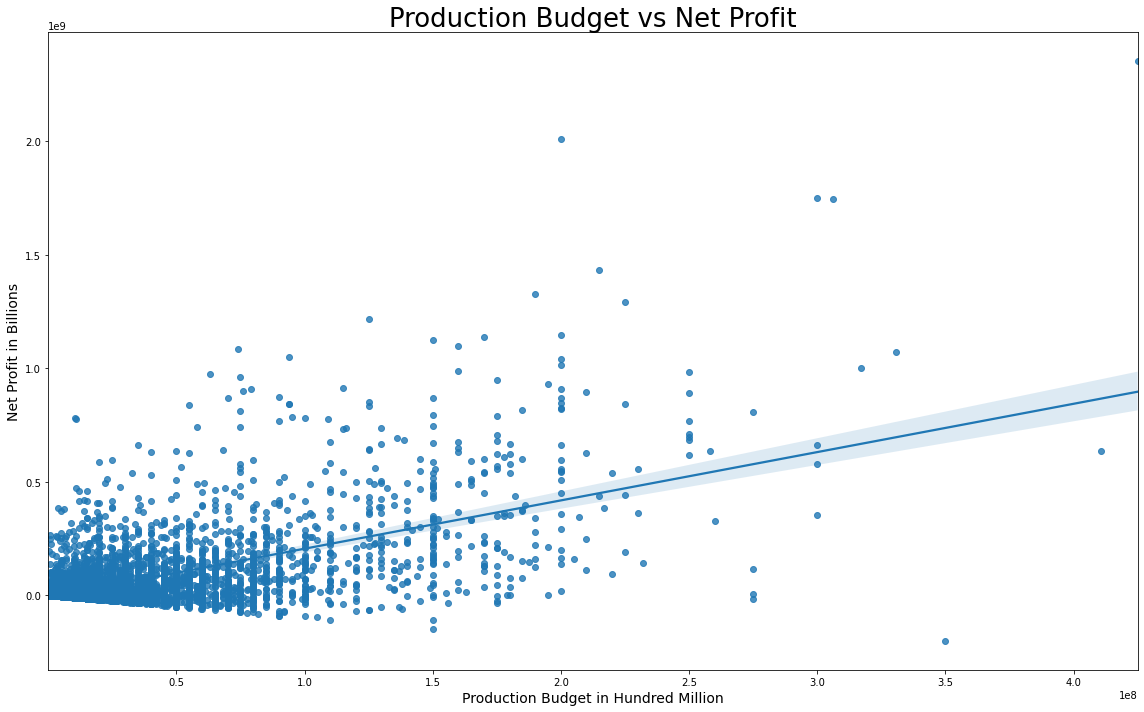

''

In [39]:
#Scatter plot to show the relationship between money spent and money made
plt.figure(figsize=(16, 10)) 
sns.regplot(x='production_budget', y='net_profit', data=budget)
plt.title('Production Budget vs Net Profit', fontsize=26)
plt.xlabel('Production Budget in Hundred Million', fontsize=14)
plt.ylabel('Net Profit in Billions', fontsize=14)
plt.tight_layout()
plt.show() 
;

__Answer__: In the movie industry the trend says yes!
***

__Question__: What kind of budget will see the most return on investment?

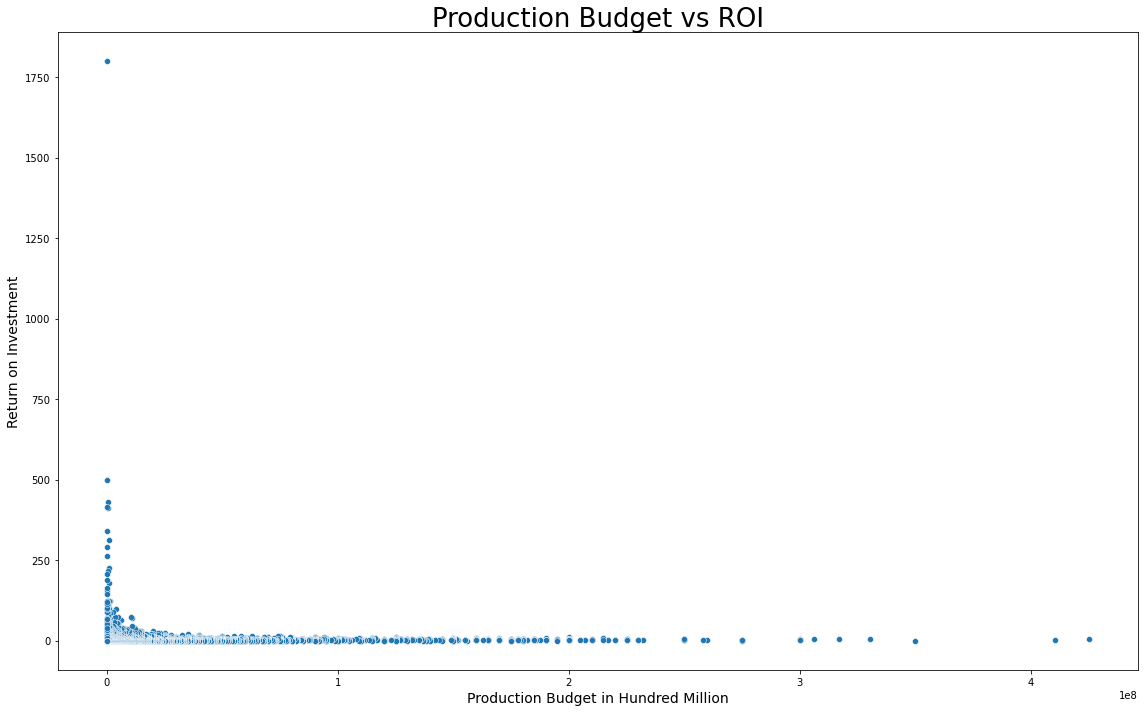

In [41]:
#Scatter plot to show the relationship between money spent and return on investment
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='ROI', data=budget)
plt.title('Production Budget vs ROI', fontsize=26 )
plt.xlabel('Production Budget in Hundred Million', fontsize=14)
plt.ylabel('Return on Investment', fontsize=14)
plt.tight_layout()
plt.show();

* We already know that the movie Deep Throat made the most ROI. Looking at the graph, it seems that it is an outlier,  so lets remove that data point and look again. 

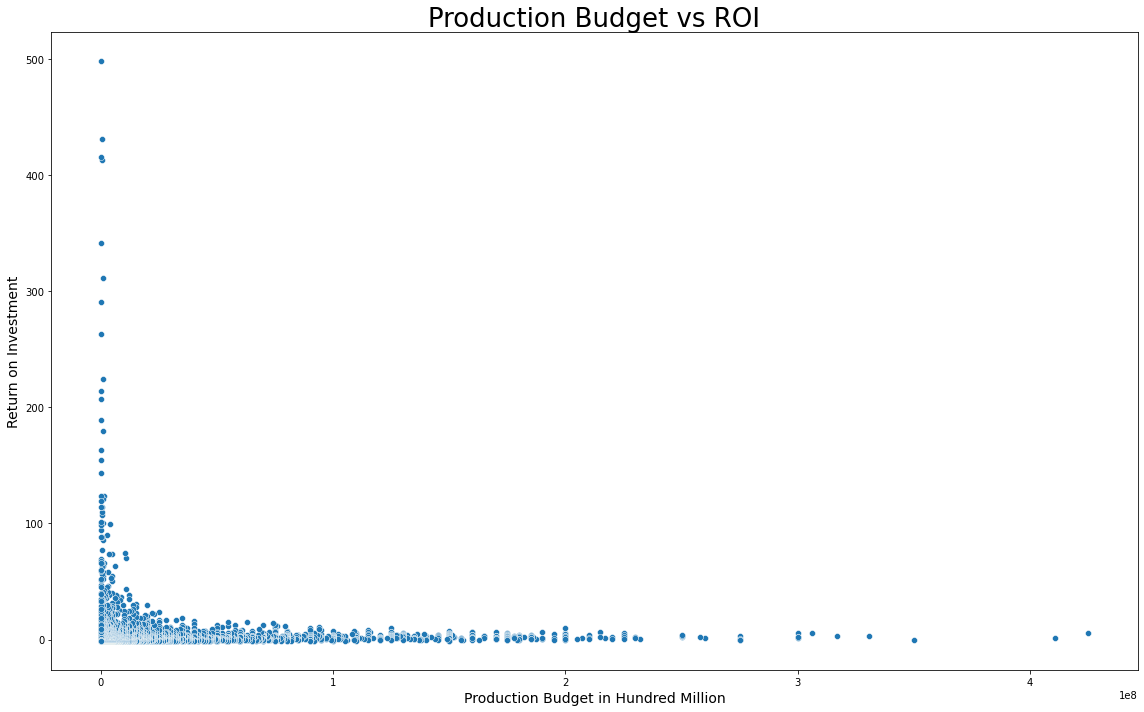

''

In [34]:
budget_no_outlier = budget.reset_index()
budget_no_outlier = budget_no_outlier[budget_no_outlier.movie != 'Deep Throat']

#Scatter plot to show the relationship between money spent and return on investment
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='ROI', data=budget_no_outlier)
plt.title('Production Budget vs ROI', fontsize= 26)
plt.xlabel('Production Budget in Hundred Million', fontsize=14)
plt.ylabel('Return on Investment', fontsize=14)
plt.tight_layout()
plt.show()
;

__Answer__: It seems that for a higher return on investment, lower budget films are where its at.

*However, while this is good information to have, based on our previous finding that it takes money to make money, I think that Microsoft will be better off putting more money in for a higher net profit.*


### Factor 2: Runtime
***

__Question__: How long should a movie's runtime be to make the most net profit?

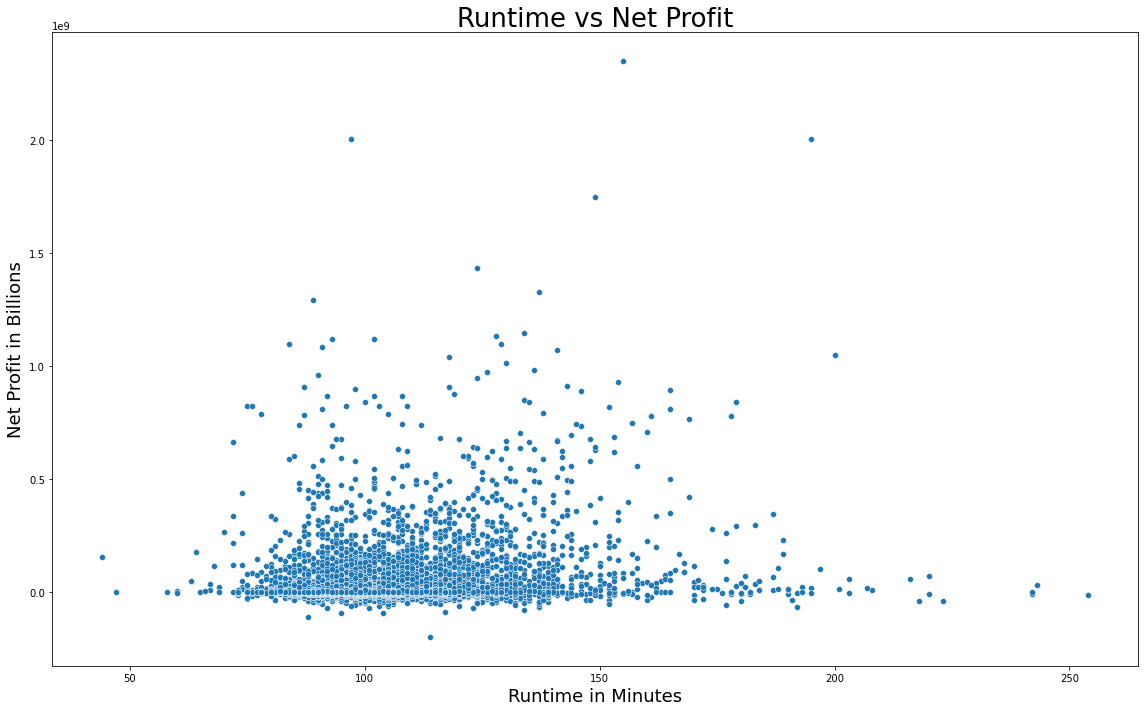

''

In [36]:
#Scatter plot to show the relationship between runtime and net profit
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='runtime', y='net_profit', data=df)
plt.title('Runtime vs Net Profit', fontsize=26)
plt.xlabel('Runtime in Minutes', fontsize=18)
plt.ylabel('Net Profit in Billions', fontsize=18)
plt.tight_layout()
plt.show()
;

__Answer__: Try to stay within 100 minutes to 150 minutes to produce the most net profit. 
***

__Question__: How long should a movie's runtime be to make the most return on investment?

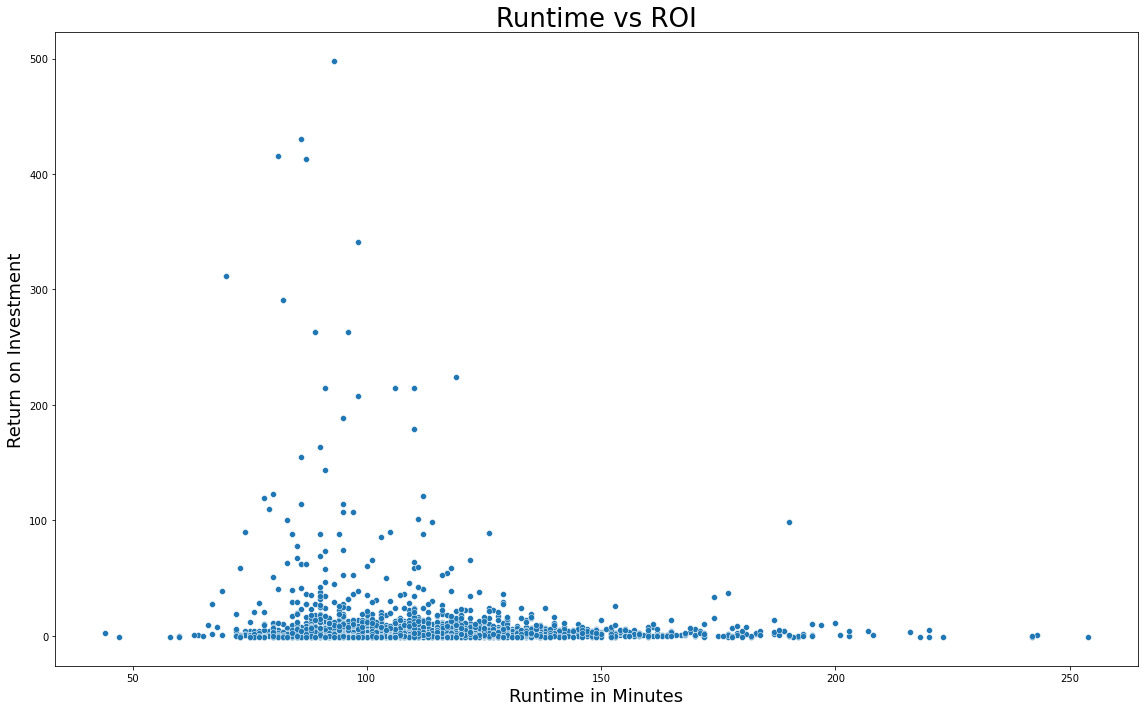

''

In [37]:
#Scatter plot to show the relationship between runtime and net profit
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='runtime', y='ROI', data=df)
plt.title('Runtime vs ROI', fontsize= 26)
plt.xlabel('Runtime in Minutes', fontsize= 18)
plt.ylabel('Return on Investment', fontsize=18)
plt.tight_layout()
plt.show()
;

__Answer__: Somewhere around 100 minutes in length brings the most ROI. 
***

### Factor 3: Directors
***

__Question__: Which directors bring in the most net profit?

In [15]:
#Create new data set so that we can explode multiple directors into new rows. 
np_directors = df.reset_index()
np_directors = np_directors[['directors', 'net_profit']]

#check to see if there are any null values
np_directors["directors"].isna().sum()

52

* There are null values that need to be taken care of before seperating directors into unique rows. 

In [16]:
np_directors.dropna(inplace=True)
np_directors["directors"].isna().sum()

0

In [17]:
#seperating multiple directors into seperate rows and eliminate white space
np_directors["directors"] = np_directors.directors.str.split(',')
np_directors = np_directors.explode("directors")
dir_np_avg = np_directors.groupby('directors').mean()
top_dir_np_avg = dir_np_avg.sort_values(by=["net_profit"], ascending=False).head(10)
top_dir_np_avg

,net_profit
directors,
Jean Negulesco,2.008208e+09
Jennifer Lee,1.122470e+09
Kyle Balda,1.086336e+09
James Cameron,1.002582e+09
Pierre Coffin,9.597278e+08
Kyle Balda,9.597278e+08
Eric Guillon,9.597278e+08
Rob Minkoff,9.069149e+08
Rich Moore,8.694296e+08


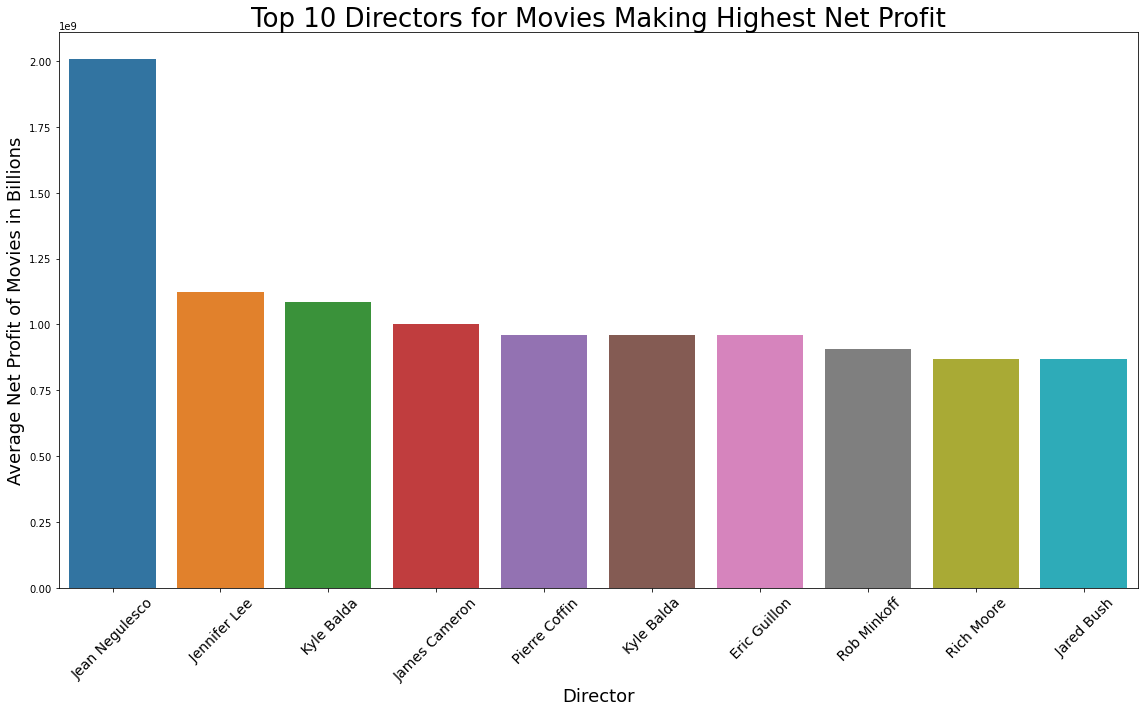

In [66]:
plt.figure(figsize=(16, 10))
sns.barplot(data=top_dir_np_avg.reset_index(), x="directors", y="net_profit")
plt.xlabel('Director', fontsize= 18)
plt.ylabel('Average Net Profit of Movies in Billions', fontsize=18)
plt.xticks(rotation= 45, fontsize=14)
plt.title("Top 10 Directors for Movies Making Highest Net Profit", fontsize=26)
plt.tight_layout()
plt.show();

__Answer__: 
- Jean Negulesco (deceased)
1. Jennifer Lee 
2. Kyle Balda
3. James Cameron
***

__Question__: Which directors bring the highest return on investment?

In [19]:
#Create new data set so that we can explode multiple directors into new rows. 
ROI_directors = df.reset_index()
ROI_directors = ROI_directors[['directors', 'ROI']]

#take care of null values
ROI_directors.dropna(inplace=True)
ROI_directors["directors"].isna().sum()


0

In [20]:
#seperating multiple directors into seperate rows and eliminate white space
ROI_directors["directors"] = ROI_directors.directors.str.split(',')
ROI_directors = ROI_directors.explode("directors")
ROI_directors['directors'] = [director.strip() for director in ROI_directors["directors"]]
dir_ROI_avg = ROI_directors.groupby('directors').mean()
top_dir_ROI_avg = dir_ROI_avg.sort_values(by=["ROI"], ascending=False).head(10)
#looking at top 10 directors in terms of ROI
top_dir_ROI_avg

,ROI
directors,
Oren Peli,430.517853
Eduardo Sánchez,412.833333
Daniel Myrick,412.833333
Graham Heid,311.354312
James Algar,311.354312
Paul Satterfield,311.354312
Norman Wright,311.354312
Perce Pearce,217.316096
David Hand,217.316096


* It seems David Hand got in the top ten list twice. Let's fix that and look at the top list again. 

In [21]:
ROI_directors["directors"] = ROI_directors["directors"].replace(["David D. Hand"], "David Hand")
dir_ROI_avg = ROI_directors.groupby('directors').mean()
top_dir_ROI_avg = dir_ROI_avg.sort_values(by=["ROI"], ascending=False).head(10)
top_dir_ROI_avg

,ROI
directors,
Oren Peli,430.517853
Eduardo Sánchez,412.833333
Daniel Myrick,412.833333
Paul Satterfield,311.354312
Norman Wright,311.354312
Graham Heid,311.354312
James Algar,311.354312
Perce Pearce,217.316096
David Hand,217.316096


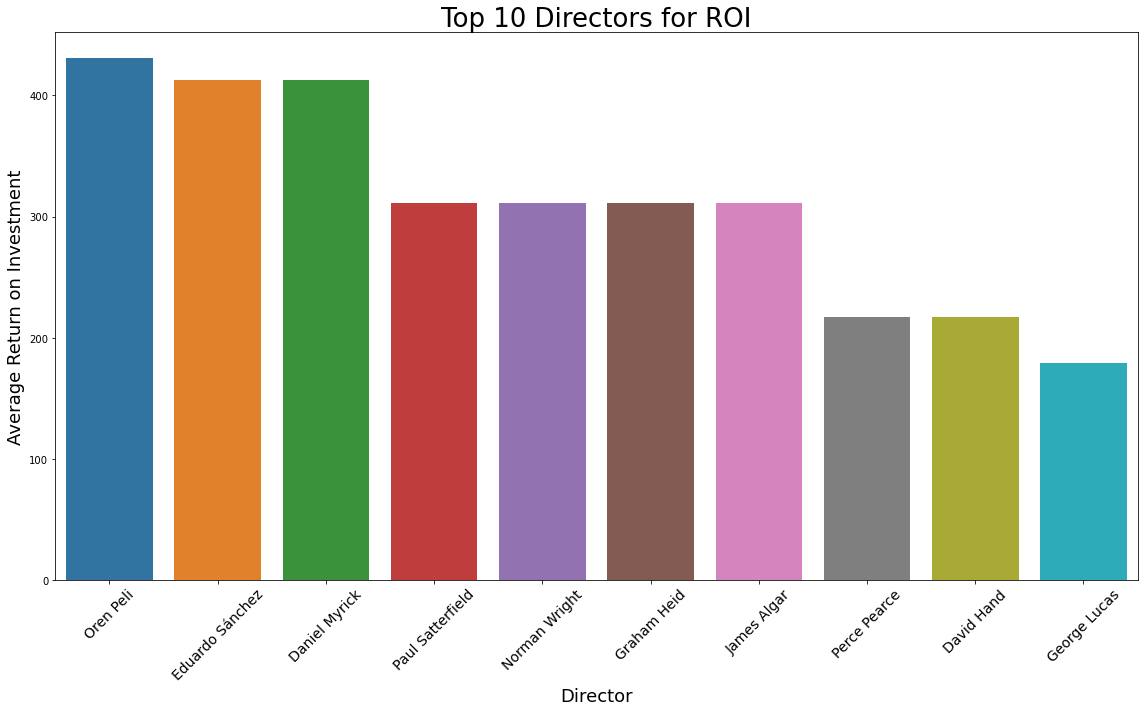

In [60]:
plt.figure(figsize=(16, 10)) 
sns.barplot(data=top_dir_ROI_avg.reset_index(), x="directors", y="ROI")
plt.xlabel('Director', fontsize=18)
plt.ylabel('Average Return on Investment', fontsize=18)
plt.xticks(rotation= 45, fontsize=14)
plt.title("Top 10 Directors for ROI", fontsize=26)
plt.tight_layout()
plt.show();

__Answer__: 
1. Oren Peli
2. Eduardo Sánchez
3. Daniel Myrick
***

### Factor 4: Genre
***

__Question__: Which genres average the highest net profit?

In [23]:
#Create new dataset and explode genres
np_genre = df.reset_index()
np_genre = np_genre[['genres', 'net_profit']]
np_genre["genres"] = np_genre.genres.str.split(',')
np_genre = np_genre.explode("genres")
np_genre['genres'] = [genre.strip() for genre in np_genre["genres"]]

#Look at average net profit per genre
genre_np_avg = np_genre.groupby('genres').mean()
top_genre_np_avg = genre_np_avg.sort_values(by=["net_profit"], ascending=False).head(10)
top_genre_np_avg

,net_profit
genres,
Animation,2.189902e+08
Kids & Family,1.543705e+08
Science Fiction & Fantasy,1.416681e+08
Action & Adventure,1.148861e+08
Musical & Performing Arts,8.109178e+07
Classics,7.039683e+07
Romance,6.880381e+07
Comedy,6.204310e+07
Mystery & Suspense,6.151759e+07


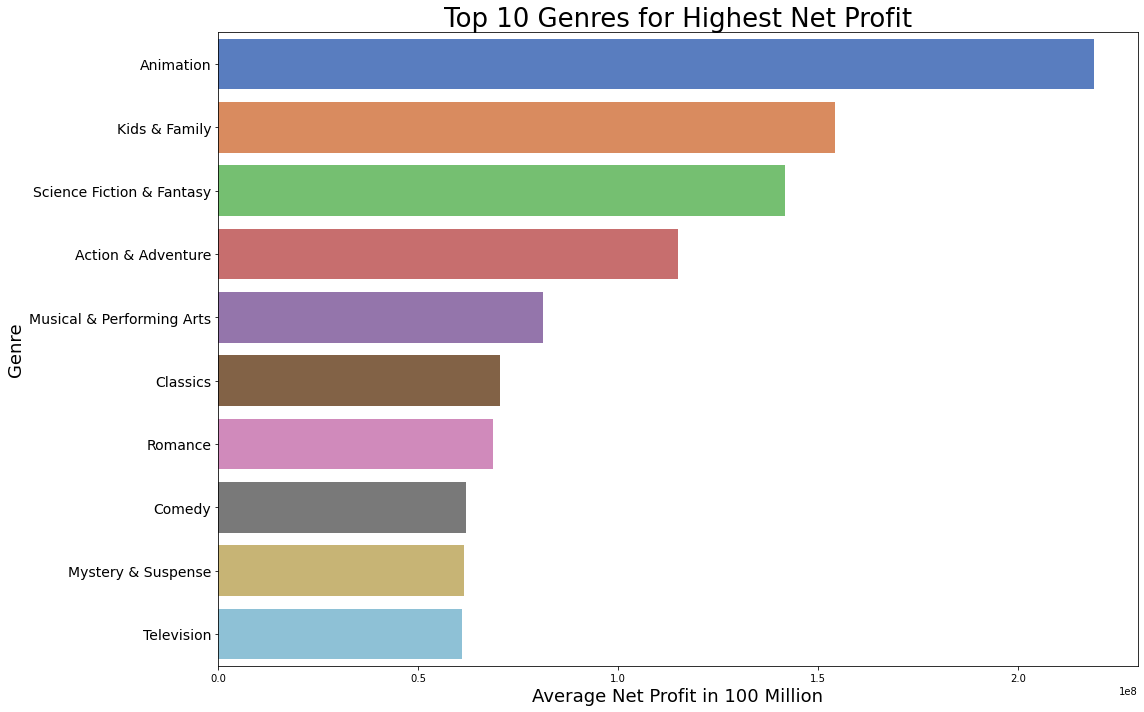

In [76]:
plt.figure(figsize=(16, 10)) 
sns.barplot(data=top_genre_np_avg.reset_index(), x="net_profit", y="genres", palette="muted", orient='h')
plt.yticks(fontsize=14)
plt.title("Top 10 Genres for Highest Net Profit", fontsize=26)
plt.xlabel('Average Net Profit in 100 Million', fontsize=18)
plt.ylabel('Genre', fontsize=18)
plt.tight_layout()
plt.show();

__Answer__: 
1. Animation
2. Kids & Family
3. Fiction & Fantasy
***

__Question__: Which genres average the highest ROI?

In [25]:
#Create new dataset and explode genres
ROI_genre = df.reset_index()
ROI_genre = ROI_genre[['genres', 'ROI']]
ROI_genre["genres"] = ROI_genre.genres.str.split(',')
ROI_genre = ROI_genre.explode("genres")
ROI_genre['genres'] = [genre.strip() for genre in ROI_genre["genres"]]

#Look at average return on investment per genre
genre_ROI_avg = ROI_genre.groupby('genres').mean()
top_genre_ROI_avg = genre_ROI_avg.sort_values(by=["ROI"], ascending=False).head(10)
top_genre_ROI_avg

,ROI
genres,
Cult Movies,46.700046
Horror,10.011205
Special Interest,9.845109
Documentary,9.323299
Sports & Fitness,8.203285
Classics,8.181431
Television,7.242534
Faith & Spirituality,6.813965
Animation,5.413841


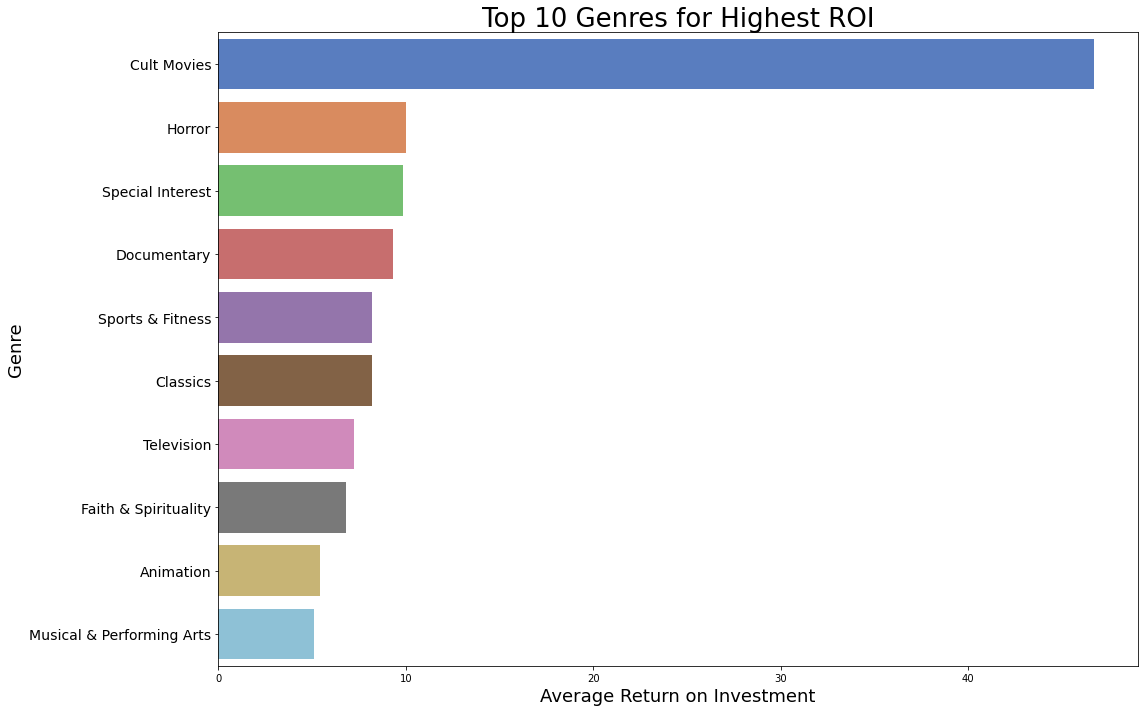

In [79]:
plt.figure(figsize=(16, 10)) 
sns.barplot(data=top_genre_ROI_avg.reset_index(), x="ROI", y="genres", palette="muted", orient='h')
plt.yticks(fontsize=14)
plt.title("Top 10 Genres for Highest ROI", fontsize=26)
plt.xlabel('Average Return on Investment', fontsize=18)
plt.ylabel('Genre', fontsize=18)
plt.tight_layout()
plt.show();

__Answer__:
*While cult classics have the highest ROI, how to cause a movie to become a cult classic is beyond the scope of this project. Therefore, cult movies will not be listed in our top 3.* 
1. Horror
2. Special Interest
3. Documentary
***

## Evaluation
***


1. In the movie industry, it takes money to make money. Microsoft should be going for a larger net profit instead of a higher return on investment with a much lower net profit.
 

2. For Microsoft to make the most net profit they should:
    * put more money into their production budgets
    * hire directors Jennifer Lee, Kyle Balda, and James Cameron
    * make movies within genres Animation, Kids & Family, and Fiction & Fantasy
    * keep runtimes within 100 to 150 minutes

3. If Microsoft wants to make some lower budget movies they can still get a high return on investment if they:
    * hire directors Oren Peli, Eduardo Sánchez, and Daniel Myrick
    * make movies within genres Horror, Special Interest, and Documentary
    * keep the runtimes around 100 minutes

## Conclusions
This project is a good starting place for Microsoft. However, due to time constraints, there are more factors that I would take into consideration before feeling confident about my reccomendations. Factors such standard deviation and inflation should be taken into consideration for future projects.
***